# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

In [12]:
import numpy as np

x = np.array([[1.5,-1],
              [0,0.5]]) # 2x2 matrix

w,v = np.linalg.eig(x) # w is the eigenvalues, v is the eigenvectors

alpha = 1/v[0][1] # 1st eigenvector, 2nd element. alpha is the inverse of the 2nd element of the 1st eigenvector. This is the same as the 2nd element of the 1st eigenvector
print(alpha) # 1.0

v2 = v * alpha # multiply the eigenvector by alpha. v2 is the eigenvector multiplied by alpha


P = x@v # P is the matrix product of x and v
P2 = x@v2 # P2 is the matrix product of x and v2

l = np.linalg.inv(v)@P # l is the inverse of v multiplied by P
l2 = np.linalg.inv(v2)@P2 # l2 is the inverse of v2 multiplied by P2

l == l2

1.4142135623730951


array([[ True,  True],
       [ True, False]])

In [2]:
# Isso não é a resposta do exercício - mas mostra alguns caminhos para encontrar a resposta.
import numpy as np
P = np.array([[1, 0], [1, 1]]).T
Q = np.diag([1.5, 0.5])
X = P @ Q @ np.linalg.inv(P)
print(X)
v, w = np.linalg.eig(X)
print(v)
print(w)

V = np.array([[1, 1]]).T
print(X @ V)

[[ 1.5 -1. ]
 [ 0.   0.5]]
[1.5 0.5]
[[1.         0.70710678]
 [0.         0.70710678]]
[[0.5]
 [0.5]]


# Exercício 2

Analise o código abaixo. 

Por que o terceiro painel mostra uma imagem igual à do primeiro painel?

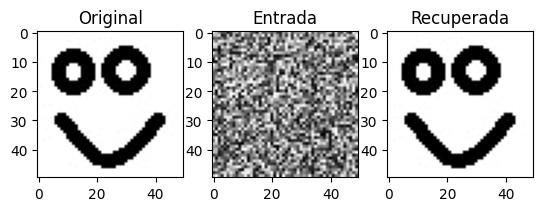

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Carregando imagem inicial
A = mpimg.imread("smile.jpg").mean(axis=2) # Convertendo para preto e branco


# número total de píxels
N = A.shape[0] * A.shape[1]

# criando uma matriz P (autovetores), que é quadrada (N x N)
P = np.random.randn(N, N)

# colocando a primeira coluna da matriz P como um reshape de A, a primeira coluna é a matriz A
P[:,0] = A.reshape( (-1,) )

# matriz de uma única linha de tamanho N, com todos os valores sendo 0.9
Q = np.ones(N) * 0.9

# primeiro valor é colocado como 1
Q[0] = 1

# transformando a matriz Q em uma matriz de diagonal (para agir como autovalores), parecida com uma matriz identidade com apenas o primeiro elemento como 1 e o resto como 0.9
Q = np.diag(Q)

# conseguindo a matriz X, que se iterada um certo número de vezes, retorna apenas a primeira coluna (matriz A) já que os valores menores que 1 de Q tendem a 0
X = P @ Q @ np.linalg.inv(P)

# Criando imagem puramente ruidosa
B = np.random.random(A.shape)

# Aplicando matriz de recuperacao
C = B.reshape( (-1, 1) )

for _ in range(100):
    # C é uma matriz de ruídos que, quando multiplicada por x, retorna basicamente a matriz A original multiplicada por uma constante, o que eventualmente converge na matriz original (após um número de iterações)
    C = X @ C

# volta a ser formato de imagem (A), para permitir a plotagem
C = C.reshape(A.shape)

# Plotando imagem inicial, ruidosa e recuperada
plt.figure()
plt.subplot(1,3,1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(B, cmap='gray')
plt.title('Entrada')
plt.subplot(1,3,3)
plt.imshow(C, cmap='gray')
plt.title('Recuperada')
plt.show()

O código utiliza uma técnica de aproximação para transformar a matriz $C$ (ruído) na mesma imagem da matriz $A$. Mas, como realizar essa transformação?

Inicialmente, temos a matriz original $A$. Com ela, podemos conseguir o número de píxels da imagem original. Esse número será tratado como $N$. Criamos uma matriz de ruído (aleatória) $P$. Ela possui as dimensões $N \times N$. 

$$
P_{N \times N}
$$

Utilizando a função `.reshape` do `numpy`, setamos a primeira coluna de $P$ como os valores de $A$. Agora, temos essencialmente nossa matriz de autovetores para a realização da conta. O próximo passo é conseguir a matriz $Q$, de autovalores.

Inicialmente, $Q$ tem uma única linha e $N$ colunas, com todos os valores sendo 0.9. Setamos o primeiro valor dessa linha como 1. Após isso, utilizando a função `np.diag()`, transformamos $Q$ (uma matriz com apenas uma linha) em uma matriz que tem esses valores na diagonal. Temos, então, que :

$$
Q_{N \times N}
$$

Para voltarmos esses valores para nossa matriz original, temos que realizar a seguinte conta:

$$
PQP^{-1}
$$

O resultado dessa conta será a matriz $X$, pois ela apenas voltará a ser a matriz $A$ após um certo número de iterações. Portanto:

$$
X = PQP^{-1}
$$

O que eu quero dizer com as iterações pode ser descrito com uma conta matemática abaixo (com $i$ sendo o número de iterações necessário para retornar $X$ aa matriz $A$):
$$
A = X^{i} = PQ^{i}P^{-1}
$$

No código abaixo, nosso $i$ tem valor de 100, portanto:
$$
A = X^{100} = PQ^{100}P^{-1}
$$

Isso ocorre pois os valores diferentes de 1 na matriz $Q$ sempre tendem a 0. Portanto, eventualmente, esses 0.9s serão tão insignificantes que apenas a primeira coluna de $P$ será contabilizada em $X$, e essa coluna é a que representa a matriz $A$.

Agora, para retornar uma matriz de ruido ao seu estado inicial basta realizar o processo acima com a matriz de ruido. Vamos supor que temos uma matriz de ruído $C$, o processo ficaria assim:

$$
C = X^{100} C
$$

Isso ocorre pois, ao realizar o processo uma única vez, temos efetivamente a matriz original multiplicada por um $\alpha$ qualquer. Issp significa que a proporção se mantém. Eventualmente, assim como $X$ converge em $A$, o processo também faz $C$ convergir em $A$. 

Esse é o processo descrito no código.

# Exercício 3

O código abaixo busca contar palavras únicas em um texto (o texto, neste caso, é o clássico livro "Moby Dick"). Contar palavras únicas significa contar quantas palavras diferentes existem em um texto - por exemplo, "ESTE TEXTO É UM TESTE" tem 5 palavras únicas, ao passo que "ESTE TEXTO É UM TEXTO" tem 4 palavras únicas.

A maneira que a função funciona é manter uma lista com todas as palavras que já foram vistas. Daí, para cada nova palavra, verificamos se ela já existe na nossa lista. Caso não exista, adicionamos a palavra, e, ao fim do processo, retornamos o tamanho dessa lista de palavras já vistas.

O problema do código é que verificar se uma palavra está em uma lista envolve varrer a lista inteira, o que, para um texto de $N$ palavras, pode levar $N$ iterações. Como fazemos isso $N$ vezes (uma para cada palavra do texto), então temos um algoritmo que executa em tempo quadrático, isto é, $O(N^2)$.

Como o tempo de execução do algoritmo cresce muito rapidamente com o aumento do número de palavras do texto, demora muito para contar palavras únicas no texto inteiro de Moby Dick. Porém, podemos medir o tempo de execução para apenas as primeiras palavras do texto.

Como sabemos que o tempo $t$ de execução do algoritmo para $N$ palavras é um polinômio de segundo grau, então:

$
t = A N^2 + BN + C,
$

use os dados da execução do teste abaixo no seu computador para fazer uma regressão usando autograd, encontre $A$, $B$ e $C$, e estime quanto tempo levaria para este algoritmo contar as palavras de todo o texto de Moby Dick.

In [4]:
import urllib.request
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
data = urllib.request.urlopen(url).read().decode('utf-8')
words = data.split()

def contar_palavras_unicas(lista_de_palavras):
    ja_contei = []
    for palavra in lista_de_palavras:
        if palavra not in ja_contei:
            ja_contei.append(palavra)
    return len(ja_contei)

lista_N = []
lista_t = []
for N in tqdm(range(100, int(len(words)/8), 1000)):
    t0 = time.time()
    contar_palavras_unicas(words[0:N])
    t1 = time.time()
    t = t1-t0
    lista_N.append(N)
    lista_t.append(t)

plt.figure()
plt.scatter(lista_N, lista_t)
plt.show()


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def erro(param):
    a,b,c,n,t = param
    t_ = a*(n**2) + b*n + c 
    return np_.mean((t_ - t)**2)

n = np.array(lista_N)*1.0
alvo = np.array(lista_t)*1.0

g = grad(erro)

A, B, C = 10**-10, 10**-8, 10**-18

alpha = 10**-17


for _ in range(100):
    a_, b_, c_, n_, alvo_ = g( (A, B, C, n, alvo) )
    A -= alpha*a_
    B -= alpha*b_
    C -= alpha*c_

print(f"A = {A}\nB = {B}\nC = {C}")

A = 6.908334477927203e-10
B = 1.0000207096261875e-08
C = 2.789223489915225e-17


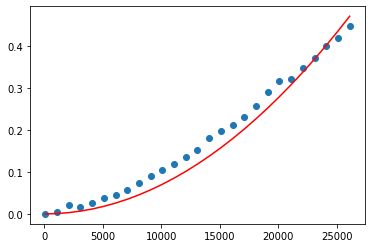

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(n,alvo)
plt.plot(n,A*(n**2) + B*n + C, color="r")
plt.show()

# Exercício 4

Um algoritmo promete comprimir a palavra `ABACATEIRO` em apenas 10 bits. Esse algoritmo é:

1. Mais, igualmente ou menos eficaz que o código de Huffman?
1. Possível ou impossível de acordo com o limite teórico dado pela entropia?

1. Um algoritmo que promete comprimir a palavra `ABACATEIRO` em apenas 10 bits seria mais eficaz do que o código de Huffman (que conseguiria comprimir a palavra em 29 bits).
2. Ele nao é possível segundo o limite teórico da entropia. A entropia deu pouco menos de 28 bits, portanto, 29 bits seriam necessários no mínimo.

In [2]:
import numpy as np
import scipy.stats as stats
palavra = "ABACATEIRO"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs, base=2)
E*len(palavra)

28.464393446710154

In [10]:
a = lambda n,i: [0 for j in range(n) if j!=i] # Essa função retorna uma lista de zeros de tamanho n, exceto na posição i, onde o valor é 1

a(5,1)

[0, 0, 0, 0, 0, 0, 0]